In [1]:
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_parquet("user.parquet")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 353.4+ MB


In [ ]:
df.head(3).T

In [ ]:
df.describe().T

In [ ]:
df.nunique()

In [ ]:
df.isnull().sum()


### Analisis de columnas numericas

In [3]:
numeric_columns = df.select_dtypes(
    include=['int64', 'float64']).columns.tolist()
numeric_columns


['review_count',
 'useful',
 'funny',
 'cool',
 'fans',
 'average_stars',
 'compliment_hot',
 'compliment_more',
 'compliment_profile',
 'compliment_cute',
 'compliment_list',
 'compliment_note',
 'compliment_plain',
 'compliment_cool',
 'compliment_funny',
 'compliment_writer',
 'compliment_photos']

In [ ]:
df[numeric_columns].head()


C:\Users\Martin\AppData\Local\Temp\ipykernel_8024\2240267847.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


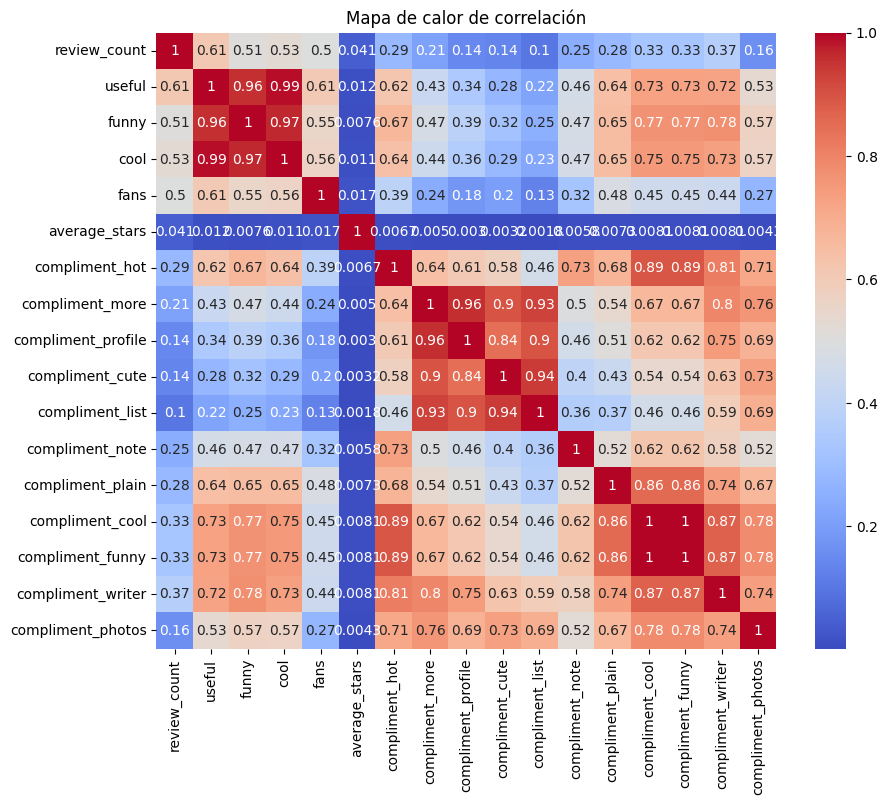

In [4]:
correlation_matrix = df.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()


C:\Users\Martin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


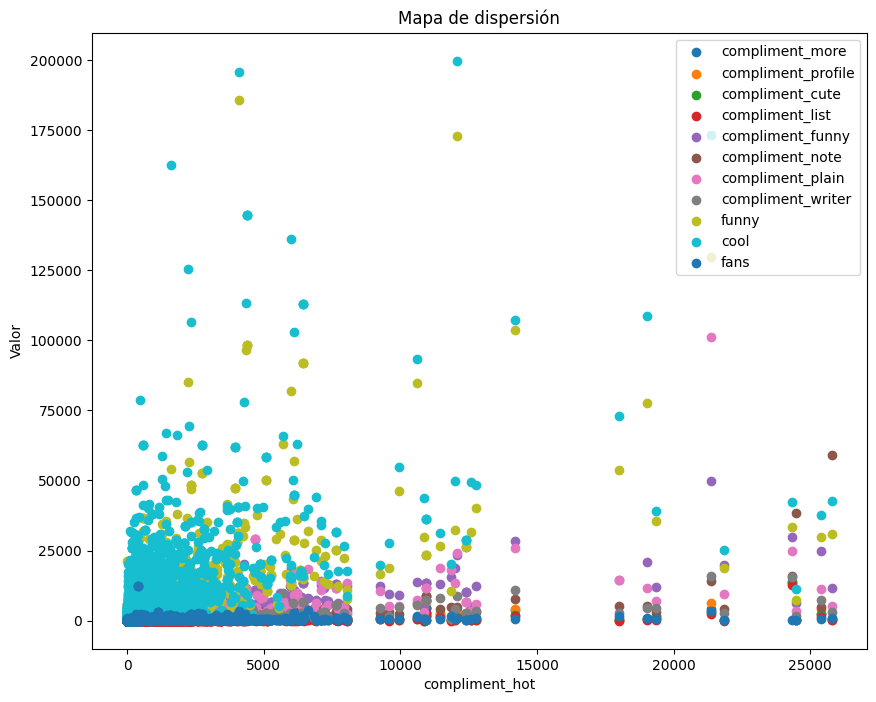

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(df['compliment_hot'], df['compliment_more'],
            label='compliment_more')
plt.scatter(df['compliment_hot'], df['compliment_profile'],
            label='compliment_profile')
plt.scatter(df['compliment_hot'], df['compliment_cute'],
            label='compliment_cute')
plt.scatter(df['compliment_hot'], df['compliment_list'],
            label='compliment_list')
plt.scatter(df['compliment_hot'], df['compliment_funny'],
            label='compliment_funny')
plt.scatter(df['compliment_hot'], df['compliment_note'],
            label='compliment_note')
plt.scatter(df['compliment_hot'], df['compliment_plain'],
            label='compliment_plain')
plt.scatter(df['compliment_hot'], df['compliment_writer'],
            label='compliment_writer')
plt.scatter(df['compliment_hot'], df['funny'],
            label='funny')
plt.scatter(df['compliment_hot'], df['cool'],
            label='cool')
plt.scatter(df['compliment_hot'], df['fans'],
            label='fans')
plt.xlabel('compliment_hot')
plt.ylabel('Valor')
plt.title('Mapa de dispersión')
plt.legend()
plt.show()


In [15]:
df1 = pd.DataFrame(df)
df1.to_json('user1.json', orient='records')


OverflowError: Could not reserve memory block